In [4]:
# coding=utf-8
import pandas as pd
import csv  # Import csv
import tweepy
import re
import string
import nltk
import pandas as pd
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np
pd.set_option('display.max_colwidth',1000)

In [5]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-

import codecs
df = pd.read_csv('PreprocessedData.csv', header = None, encoding='utf-8', engine='python')
df.columns = ['ID','User','CREATED_AT','LABEL','stemming_words']
df = df.iloc[1: , :] # start from first column
df.head()

,ID,User,CREATED_AT,LABEL,stemming_words
1,2,1.41E+18,7/11/2021 9:59,Crime,අන්තර්ජාල ඔස්සේ අළෙවි වූ බාලවයස්කාර දැරිය අපයෝජන කිරීමේ සිද්ධිය සම්බන්ධ පොලිස් ක්රීඩා කොට්ඨාසයේ උප පොලිස් පරීක්ෂකවරයකු රජයේ ප්රධාන පෙළේ බැංකුවක හිටපු කළමණාකාරවරයකු ළමා කාන්තා කාර්යාංශ අද අත්අඩංගුව ගනු ලැබ තිබේ
2,4,1.41E+18,7/11/2021 9:14,Sport,ක්රීඩා අමාත්යාංශයෙන් බොක්සිං මිලියන
3,6,1.41E+18,7/11/2021 9:13,Sport,මේසපන්දුව දියුණු කරන්නට ක්රීඩා අමාත්යංශය ගිවිසුම්ගත වෙයි
4,8,1.41E+18,7/11/2021 6:39,Sport,පී සරවනමුත්තු කුසලා අන්තර්සමාජ පළමු ඛාණ්ඩ ශූරයන් වූ සිංහල ක්රීඩා සමාජ පිල ශ්රී ලංකව විවිධ අවධි වල නියෝජන කල ක්රීඩකයන් රැසක් සිටින එවක ශ්රී ලංකා නායක අර්ජුන රණතුංග සාමාන් ක්රීඩකයෙක් වසරේදී ක්රීඩා සමාජයට ක්රීඩා කර ඇත
5,10,1.41E+18,7/11/2021 6:11,Politics,ක්රීඩා ඇමැතිතුමා තවම හරි අය හරි තැන්වල දාගෙන සුනිල ගුණවර්ධන


In [6]:
def print_plot(index):
    example = df[df.index == index][['stemming_words', 'LABEL']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

ඉන්දියාව ක්රිකට් තරඟ ක්රීඩා කිරීමට සිටි ශ්රී ලංකා ජෛව තාක්ෂණික බුබුලේ සිටි සඳුන් වීරක්කොඩි හට කොරෝනා ආසාදන වී තිබෙනව ඔහු සඳහන් කලේ වනවිට ඔහු කණ්ඩායමෙ වෙන්ව තැබීමට බලධාරී ක්රියාකර බව
Tag: Sport


In [7]:
from sklearn.model_selection import train_test_split
X = df.stemming_words
y = df.LABEL
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

NameError: name 'Pipeline' is not defined

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
dataset.plot(x='LABEL', y='stemming_words', style='o')
plt.title('Label vs stemming words')
plt.xlabel('labels')
plt.ylabel('stemming words')
plt.show()

TypeError: no numeric data to plot

In [10]:
true_slope = 10.889
true_intercept = 3.456
input_var = np.arange(0.0,100.0)
output_var = true_slope * input_var + true_intercept + 500.0 * np.random.rand(len(input_var))

<IPython.core.display.Javascript object>


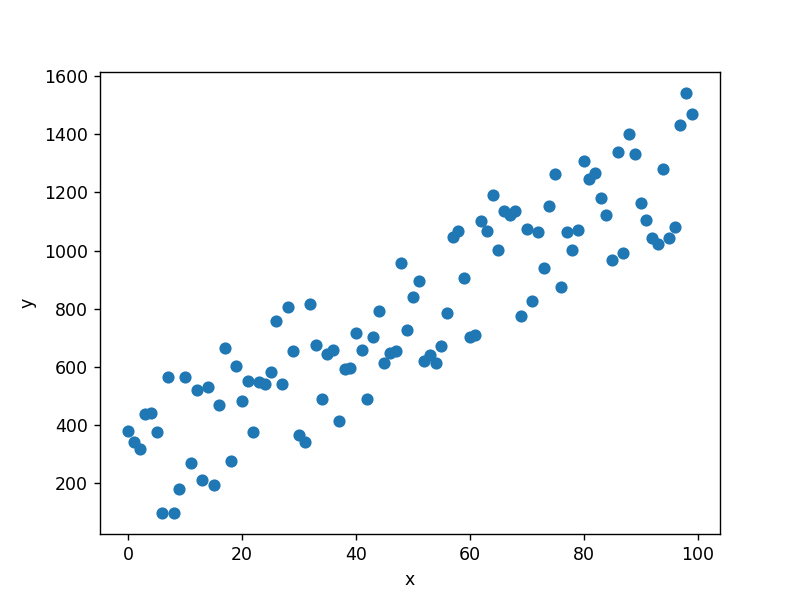

In [11]:
%matplotlib notebook
plt.figure()
plt.scatter(input_var, output_var)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
def compute_cost(input_var, output_var, params):
    "Compute linear regression cost"
    num_samples = len(input_var)
    cost_sum = 0.0
    for x,y in zip(input_var, output_var):
        y_hat = np.dot(params, np.array([1.0, x]))
        cost_sum += (y_hat - y) ** 2
    
    cost = cost_sum / (num_samples * 2.0)
    
    return cost


In [13]:
def lin_reg_batch_gradient_descent(input_var, output_var, params, alpha, max_iter):
    """Compute the params for linear regression using batch gradient descent""" 
    iteration = 0
    num_samples = len(input_var)
    cost = np.zeros(max_iter)
    params_store = np.zeros([2, max_iter])
    
    while iteration < max_iter:
        cost[iteration] = compute_cost(input_var, output_var, params)
        params_store[:, iteration] = params
        
        print('--------------------------')
        print(f'iteration: {iteration}')
        print(f'cost: {cost[iteration]}')
        
        for x,y in zip(input_var, output_var):
            y_hat = np.dot(params, np.array([1.0, x]))
            gradient = np.array([1.0, x]) * (y - y_hat)
            params += alpha * gradient/num_samples
            
        iteration += 1
    
    return params, cost, params_store

In [14]:
"""Train the model"""
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.20)

params_0 = np.array([20.0, 80.0])

alpha_batch = 1e-3
max_iter = 500
params_hat_batch, cost_batch, params_store_batch =\
    lin_reg_batch_gradient_descent(x_train, y_train, params_0, alpha_batch, max_iter)

--------------------------
iteration: 0
cost: 6963877.473920842
--------------------------
iteration: 1
cost: 26318.039717677922
--------------------------
iteration: 2
cost: 18940.293508862156
--------------------------
iteration: 3
cost: 18965.258019058496
--------------------------
iteration: 4
cost: 18961.84422471231
--------------------------
iteration: 5
cost: 18957.089561638593
--------------------------
iteration: 6
cost: 18952.290172147586
--------------------------
iteration: 7
cost: 18947.491804763653
--------------------------
iteration: 8
cost: 18942.696058216832
--------------------------
iteration: 9
cost: 18937.90298696526
--------------------------
iteration: 10
cost: 18933.112591470028
--------------------------
iteration: 11
cost: 18928.324870304885
--------------------------
iteration: 12
cost: 18923.53982197846
--------------------------
iteration: 13
cost: 18918.75744499788
--------------------------
iteration: 14
cost: 18913.97773787102
--------------------------

--------------------------
iteration: 164
cost: 18226.419581557755
--------------------------
iteration: 165
cost: 18222.026376663867
--------------------------
iteration: 166
cost: 18217.63562424857
--------------------------
iteration: 167
cost: 18213.247322942036
--------------------------
iteration: 168
cost: 18208.86147137519
--------------------------
iteration: 169
cost: 18204.47806817973
--------------------------
iteration: 170
cost: 18200.09711198813
--------------------------
iteration: 171
cost: 18195.718601433593
--------------------------
iteration: 172
cost: 18191.34253515011
--------------------------
iteration: 173
cost: 18186.96891177242
--------------------------
iteration: 174
cost: 18182.59772993607
--------------------------
iteration: 175
cost: 18178.228988277322
--------------------------
iteration: 176
cost: 18173.86268543319
--------------------------
iteration: 177
cost: 18169.498820041492
--------------------------
iteration: 178
cost: 18165.13739074079
----

--------------------------
iteration: 363
cost: 17398.763411260214
--------------------------
iteration: 364
cost: 17394.832226068953
--------------------------
iteration: 365
cost: 17390.90323529852
--------------------------
iteration: 366
cost: 17386.97643772327
--------------------------
iteration: 367
cost: 17383.051832118224
--------------------------
iteration: 368
cost: 17379.129417259093
--------------------------
iteration: 369
cost: 17375.209191922266
--------------------------
iteration: 370
cost: 17371.291154884828
--------------------------
iteration: 371
cost: 17367.37530492454
--------------------------
iteration: 372
cost: 17363.46164081985
--------------------------
iteration: 373
cost: 17359.550161349875
--------------------------
iteration: 374
cost: 17355.640865294426
--------------------------
iteration: 375
cost: 17351.733751434018
--------------------------
iteration: 376
cost: 17347.8288185498
--------------------------
iteration: 377
cost: 17343.92606542363
--

In [15]:
def lin_reg_stoch_gradient_descent(input_var, output_var, params, alpha):
    """Compute the params for linear regression using stochastic gradient descent"""
    num_samples = len(input_var)
    cost = np.zeros(num_samples)
    params_store = np.zeros([2, num_samples])
    
    i = 0
    for x,y in zip(input_var, output_var):
        cost[i] = compute_cost(input_var, output_var, params)
        params_store[:, i] = params
        
        print('--------------------------')
        print(f'iteration: {i}')
        print(f'cost: {cost[i]}')
        
        y_hat = np.dot(params, np.array([1.0, x]))
        gradient = np.array([1.0, x]) * (y - y_hat)
        params += alpha * gradient/num_samples
        
        i += 1
            
    return params, cost, params_store

In [16]:
alpha = 1e-3
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store =\
lin_reg_stoch_gradient_descent(x_train, y_train, params_0, alpha)

--------------------------
iteration: 0
cost: 6963877.473920842
--------------------------
iteration: 1
cost: 6762754.781212916
--------------------------
iteration: 2
cost: 6762223.11502103
--------------------------
iteration: 3
cost: 5690270.60113738
--------------------------
iteration: 4
cost: 5586527.282652645
--------------------------
iteration: 5
cost: 5587243.864748518
--------------------------
iteration: 6
cost: 5298718.141199624
--------------------------
iteration: 7
cost: 5288631.32531799
--------------------------
iteration: 8
cost: 5290036.015197465
--------------------------
iteration: 9
cost: 5130390.665313933
--------------------------
iteration: 10
cost: 4201096.363294654
--------------------------
iteration: 11
cost: 4202345.014582386
--------------------------
iteration: 12
cost: 4167763.121657057
--------------------------
iteration: 13
cost: 3999388.5892553767
--------------------------
iteration: 14
cost: 3396994.333987714
--------------------------
iteration:

<IPython.core.display.Javascript object>


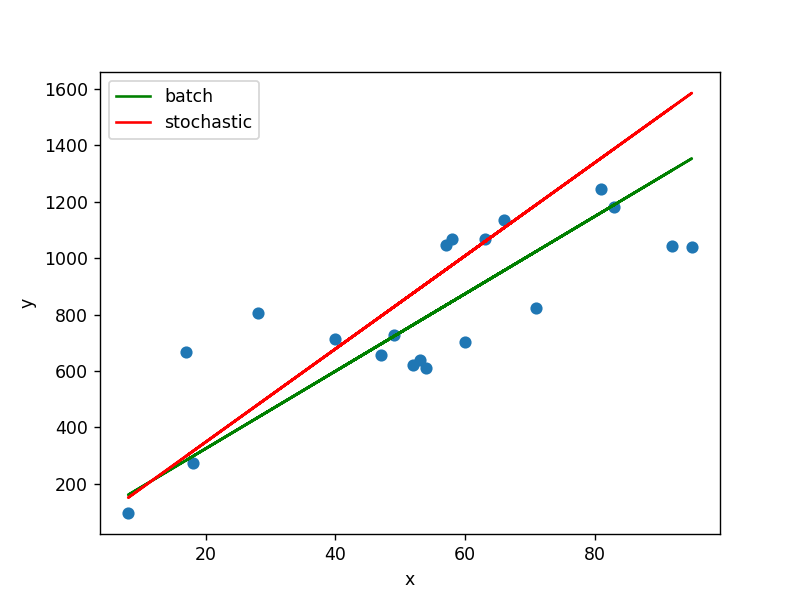

batch      T0, T1: 51.43124312922069, 13.708149201729324
stochastic T0, T1: 19.106345160941853, 16.49291941643518
batch rms:      196.5689079214904
stochastic rms: 258.25185117993436


In [17]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g', label='batch')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r', label='stochastic')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print(f'batch      T0, T1: {params_hat_batch[0]}, {params_hat_batch[1]}')
print(f'stochastic T0, T1: {params_hat[0]}, {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'batch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

<IPython.core.display.Javascript object>


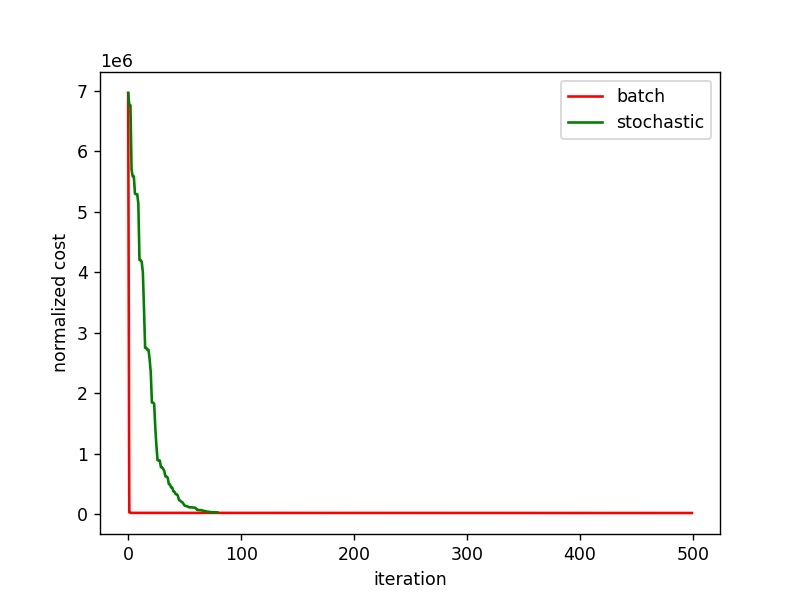

min cost with BGD: 16883.773639719533
min cost with SGD: 26419.37301525497


In [18]:
plt.figure()
plt.plot(np.arange(max_iter), cost_batch, 'r', label='batch')
plt.plot(np.arange(len(cost)), cost, 'g', label='stochastic')
plt.xlabel('iteration')
plt.ylabel('normalized cost')
plt.legend()
plt.show()
print(f'min cost with BGD: {np.min(cost_batch)}')
print(f'min cost with SGD: {np.min(cost)}')